<a href="https://colab.research.google.com/github/muhammadhaerul25/Air-Quality-Classification-DKI-Jakarta-Province-using-KNN-Algorithm/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/Datasets/calonpembeli_ch5.csv')
df1.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [3]:
df1.shape

(1000, 7)

In [4]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [5]:
df1 = df1[df1['Usia']<=100]
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,501.073146,43.323647,1.469940,0.480962,0.953908,270.430862,0.634269
std,288.823862,11.774139,1.073338,0.499888,0.801127,95.026802,0.481876
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,252.250000,33.000000,1.000000,0.000000,0.000000,187.250000,0.000000
50%,501.500000,43.000000,1.000000,0.000000,1.000000,259.000000,1.000000
75%,750.750000,53.000000,2.000000,1.000000,2.000000,352.750000,1.000000
max,1000.000000,65.000000,3.000000,1.000000,4.000000,490.000000,1.000000


In [6]:
df1.shape

(998, 7)

In [7]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [8]:
#to drop missing value
df1.dropna()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [9]:
df1['Beli_Mobil'].value_counts() #the data doesn't balance

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [10]:
#undersampling = delete some data from the majority class
#oversampling = generate some data for minority class

In [11]:
X = df1[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df1.Beli_Mobil

In [12]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
import sklearn.linear_model as lm
model1 = lm.LogisticRegression(solver='lbfgs')
model1.fit(X_train, y_train)


LogisticRegression()

In [14]:
print(model1.coef_)

[[-0.0159435  -0.17093131 -1.03941699  0.07720535  0.05686692]]


In [15]:
y_predict = model1.predict(X_test)
print(y_predict)
print(y_test)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]
272    1
727    0
31     0
344    1
606    1
      ..
937    1
624    0
257    1
274    0
486    1
Name: Beli_Mobil, Length: 200, dtype: int64


In [31]:
import sklearn.metrics as metric
confusion_matrix = metric.confusion_matrix(y_test, y_predict)
confusion_matrix

array([[ 59,   4],
       [  5, 132]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


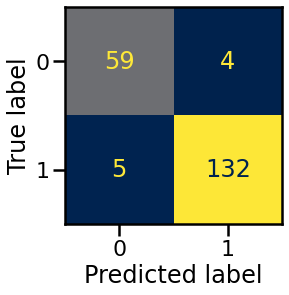

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
clf1=LogisticRegression().fit(X_train,y_train)
sns.set_context("poster")
disp = plot_confusion_matrix(clf1,X_test,y_test,cmap='cividis',colorbar=False)

In [28]:
#default formula
score = model1.score(X_test, y_test)
score

0.955

In [32]:
#accuracy = TP + TN / Total
accuracy = metric.accuracy_score(y_test, y_predict)
print(accuracy*100, '%')

95.5 %


In [33]:
#precision = TP / (TP + FP) 
precision = metric.precision_score(y_test, y_predict)
precision

0.9705882352941176

In [34]:
#recall/sensitivity = TP / (TP + FN)
recall = metric.recall_score(y_test, y_predict)
recall

0.9635036496350365

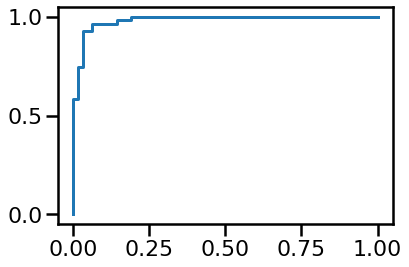

In [35]:
import matplotlib.pyplot as plt
y_pred_prob = model1.predict_proba(X_test)[::,1]
fp, tp, _ = metric.roc_curve(y_test, y_pred_prob)
auc = metric.roc_auc_score(y_test, y_predict)
plt.plot(fp, tp)
plt.show()

In [36]:
auc = metric.roc_auc_score(y_test, y_predict)
auc

0.9500057930714866

##**Resampling:**

###**Oversampling**

In [17]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resampled = ros.fit_resample(X_train,y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 4.3 MB/s 
     |████████████████████████████████| 199 kB 51.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [18]:
X_train.value_counts

<bound method DataFrame.value_counts of      Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan
694    39       3        0               1          273
518    52       1        1               1          181
882    36       2        1               0          315
113    42       3        0               1          233
873    40       1        1               1          418
..    ...     ...      ...             ...          ...
837    37       0        0               1          369
192    37       2        0               1          290
631    44       0        1               2          222
561    42       2        1               2          180
686    44       2        0               0          216

[798 rows x 5 columns]>

In [19]:
y_train.value_counts

<bound method IndexOpsMixin.value_counts of 694    1
518    0
882    1
113    1
873    1
      ..
837    1
192    1
631    1
561    0
686    0
Name: Beli_Mobil, Length: 798, dtype: int64>

In [20]:
X_train_resampled.value_counts

<bound method DataFrame.value_counts of      Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan
0      39       3        0               1          273
1      52       1        1               1          181
2      36       2        1               0          315
3      42       3        0               1          233
4      40       1        1               1          418
..    ...     ...      ...             ...          ...
987    31       0        1               0          190
988    38       2        1               1          220
989    31       1        0               1          220
990    47       3        0               1          135
991    31       3        1               1          198

[992 rows x 5 columns]>

In [21]:
y_train_resampled.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      1
4      1
      ..
987    0
988    0
989    0
990    0
991    0
Name: Beli_Mobil, Length: 992, dtype: int64>

In [23]:
df2 = y_train_resampled
df2.value_counts()

1    496
0    496
Name: Beli_Mobil, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


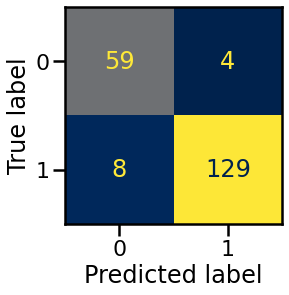

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

clf = LogisticRegression().fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='cividis',colorbar=False)

In [38]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
print('score =', score*100, '%')

precision = metric.precision_score(y_test,y_pred)
print('precision =', precision*100, '%')

recall = metric.recall_score(y_test,y_pred)
print('recal =', recall*100, '%')

auc = metric.roc_auc_score(y_test,y_pred)
print('auc =', auc*100, '%')

score = 94.0 %
precision = 96.99248120300751 %
recal = 94.16058394160584 %
auc = 93.90568879619975 %


###**Over-Sampling using SMOTE**

In [39]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_train_resampled1, y_train_resampled1 = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


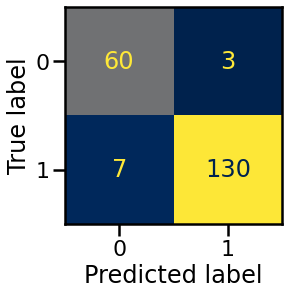

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

clf = LogisticRegression().fit(X_train_resampled1, y_train_resampled1)
y_pred1 = clf.predict(X_test)

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='cividis',colorbar=False)

In [41]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
print('score =', score*100, '%')

precision = metric.precision_score(y_test,y_pred)
print('precision =', precision*100, '%')

recall = metric.recall_score(y_test,y_pred)
print('recal =', recall*100, '%')

auc = metric.roc_auc_score(y_test,y_pred)
print('auc =', auc*100, '%')

score = 94.0 %
precision = 96.99248120300751 %
recal = 94.16058394160584 %
auc = 93.90568879619975 %


##**Feature Selection RFE:**

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lm.LogisticRegression(), n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print('Support = ',rfe.support_)
print('Ranking = ',rfe.ranking_)

Support =  [False  True  True False  True]
Ranking =  [3 1 1 2 1]
